# A short theory and implementation of numerical methods on 1D advection equation

## Advection equation

The advection equation in one-dimensional space is written as

\begin{equation}
\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0,
\end{equation}

where $u$ is the wave distribution in space $x$ and time $t$, and $c$ is wave velocity. Let's assume $u \in (0,l)$ and $t \in (0,T)$. To demonstrate the effectiveness of each method on discontinouos solution, the initial condition of $u(x,t)$ is set to unity in $x=[1.5,2]$, and zero in the rest of the domain.

## Methods

### Backward Euler

In the Backward Euler method, the time derivative is discretized as forward difference and the space derivative is discretized as backward difference.

\begin{equation}
\frac{u_j^{n+1} - u_j^n}{\Delta t}+c\frac{u_j^n - u_{j-1}^n}{\Delta x} = 0.
\end{equation}

Moving all $n+1$ terms to the left hand side leads to

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{\Delta x}(u_j^n - u_{j-1}^n).
\end{equation}

### Foreward Euler

Both time and space derivaties are discretized by foreward differences.

\begin{equation}
\frac{u_j^{n+1} - u_j^n}{\Delta t}+c\frac{u_{j+1}^n - u_j^n}{\Delta x} = 0,
\end{equation}

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{\Delta x}(u_{j+1}^n - u_{j}^n).
\end{equation}

### Forward Time Central Space (FTCS)

A typical discretization path is to use foreward differences for the time derivates, and central differences for the space derivatives.

\begin{equation}
\frac{u_j^{n+1} - u_j^n}{\Delta t}+c\frac{u_{j+1}^n - u_{j-1}^n}{\Delta x} = 0,
\end{equation}

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n).
\end{equation}

### Leapfrog

What eles? the next choice would be using a central differencing scheme for both time and space deriatives. Though, because of the jump in time domain, we need a solution for the $n=1$ timestep. One solution could be using Backward Euler method for the $n=1$ timestep, and then switch to Leapfrog method.

\begin{equation}
u_j^{n+1} = u_j^{n-1} - \frac{c\Delta t}{\Delta x}(u_{j+1}^n - u_{j-1}^n).
\end{equation}

### Lax-Wendroff

The trick for the Lax-Wendroff scheme is to derive Taylor series for $u(x,t)$ and substitie temporal terms with spatial terms so we can acheieve second-order accuracy in time and space. [[1]](https://hplgit.github.io/fdm-book/doc/pub/book/sphinx/._book012.html#the-lax-wendroff-method)

\begin{equation}
u_j^{n+1} = u_j^n - \frac{c\Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n) + \frac{1}{2}(\frac{c\Delta t}{\Delta x})^{2}(u_{j+1}^n - 2u_j^n + u_{j-1}^n).
\end{equation}

### Lax

What if we modify the FTCS scheme with averaging the neighbor values to represent the current timestep value? This idea brings us the Lax (or Lax-Friedrichs) method.

\begin{equation}
u_j^{n+1} = \frac{u_{j+1}^n + u_{j-1}^n}{2} - \frac{c\Delta t}{2\Delta x}(u_{j+1}^n - u_{j-1}^n)
\end{equation}

### Hybrid Theta

The previous explicit schemes are, unfortunately, not always stable (see next section). So we may decide to use implicit schemes with the hope of better stability. This decision leads to an extra step in each timestep, finding the value of finite $u$'s by solving a linear system of equations.

\begin{equation}
u_j^{n+1} + (\frac{c\Delta t}{2\Delta x})(u_{j+1}^{n+1} - u_{j-1}^{n+1}) = u_j^n.
\end{equation}

A better formulation would be merging the explicit and implicit methods with a parameter $\theta$ so that one can switch between implicit and explicit methods. The next formula blends the implicit and explicit Backward Euler method, such that $\theta=1$ resemles a fully implicit method while $\theta=0$ returns the fully explicit method. Any $\theta$ values between 0 and 1 combines a fraction of both characterisctics.

\begin{equation}
u_j^{n+1} + \theta(\frac{c\Delta t}{2\Delta x})(u_{j+1}^{n+1} - u_{j-1}^{n+1}) = u_j^n - (1-\theta)\frac{c\Delta t}{2 \Delta x}(u_{j+1}^n - u_{j-1}^n)
\end{equation}

### 2nd order in time, 4th order in space (T2S4)

In the spirit of numerical method design, we may choose to have a method that is 2nd-order accurate in time and 4th-order accurate in space. In order to achieve this goal, one path is to extend Lax-Wendroff method by retaining higher order terms. The following formula exhibits the outcome.

\begin{equation}
u_j^{n+1} = u_j^n - c\frac{\Delta t}{\Delta x}\Big[-\frac{u_{j+2}^n}{12} + \frac{2}{3}u_{j+1}^n -\frac{2}{3}u_{j-1}^n + \frac{u_{j-2}^n}{12}\Big] + \frac{1}{2}\Big(\frac{c\Delta t}{\Delta x}\Big)^2 \Big[-\frac{u_{j+2}^n}{12} + \frac{4}{3}u_{j+1}^n - \frac{5}{2}u_j^n + \frac{4}{3}u_{j-1}^n - \frac{u_{j-2}^n}{12} \Big]
\end{equation}

## Solution

Of course, what matters is that how these methods solve the original PDE.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df_BE_1 = pd.read_csv('../../testCases/1-BE/results-0.csv')
df_BE_2 = pd.read_csv('../../testCases/1-BE/results-30.csv')
df_BE_3 = pd.read_csv('../../testCases/1-BE/results-40.csv')

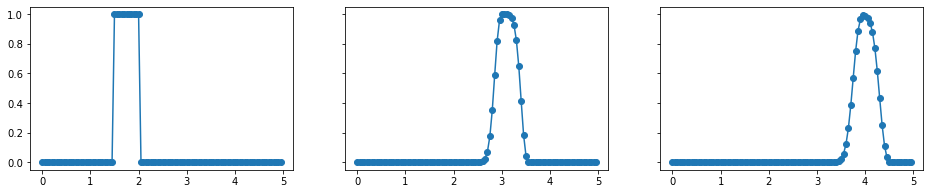

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,3))

y1 = df_BE_1['u']
y2 = df_BE_2['u']
y3 = df_BE_3['u']
x1 = df_BE_1['x']
x2 = df_BE_2['x']
x3 = df_BE_3['x']

ax1.plot(x1,y1,'o-');
ax2.plot(x2,y2,'o-');
ax3.plot(x3,y3,'o-');

Not quite good for Backward Euler method. The step moves from the left to the right, but also the original shape is not retained. It is becoming more and more dissipated.

Probably a better way to visualize it is to see this through a short animation:

In [41]:
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure();
ax = plt.axes(xlim=(-0.2, 5.5), ylim=(-0.7, 1.4));
line, = ax.plot([], [], 'o-', lw=1);

def init():
    line.set_data([], [])
    return line

def animate(i):
    filename = "../../testCases/1-BE/results-{}.csv".format(i)
    xy = np.genfromtxt(filename, delimiter=",")
    x = xy[:,0]; y = xy[:,1]
    line.set_data(x, y)
    return line

anim = animation.FuncAnimation(fig, animate, init_func = init, 
                               frames=87, interval=50, repeat=False)
plt.close()
HTML(anim.to_jshtml())

The sqaure wave comes back to the domain from the left, because of the periodic boundary condition. Now let's look at all other methods.

In [32]:
df_BE = pd.read_csv('../../testCases/1-BE/results-40.csv')
df_FE = pd.read_csv('../../testCases/2-FE/results-40.csv')
df_FTCS = pd.read_csv('../../testCases/3-FTCS/results-40.csv')
df_LF = pd.read_csv('../../testCases/4-Leapfrog/results-40.csv')
df_LW = pd.read_csv('../../testCases/5-Lax-Wendroff/results-40.csv')
df_Lax = pd.read_csv('../../testCases/6-Lax/results-40.csv')
df_HT = pd.read_csv('../../testCases/7-Hybrid-theta/results-40.csv')
df_T2S4 = pd.read_csv('../../testCases/8-T2S4/results-40.csv')

In [5]:
import matplotlib.ticker as ticker

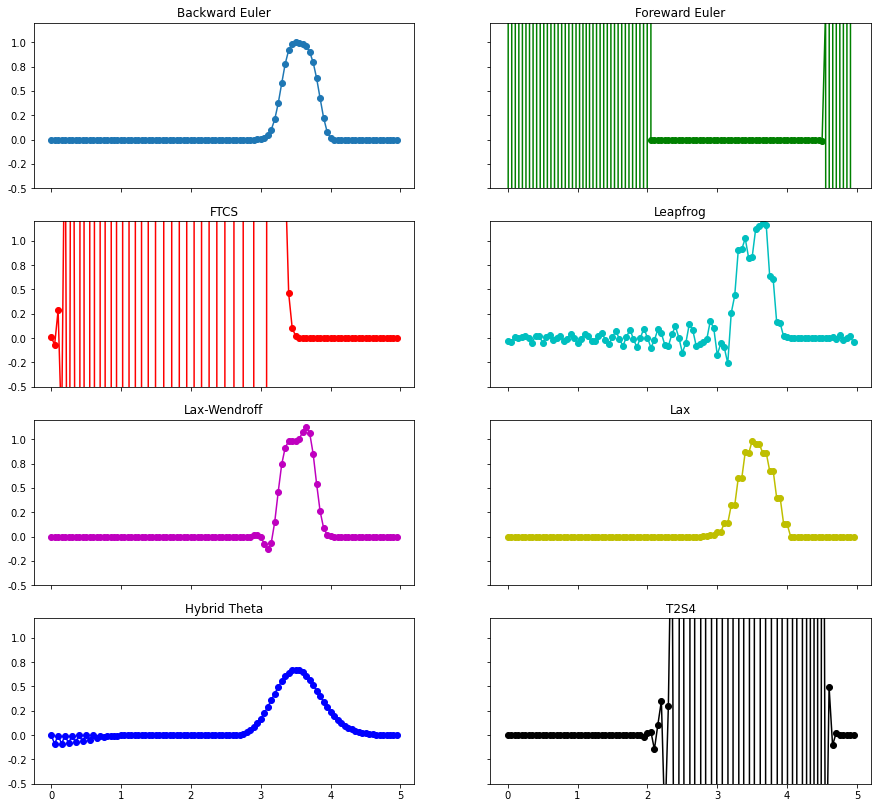

In [37]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15,14))

ax1.set(ylim=(-0.5, 1.2))

x = df_BE['x']

y1 = df_BE['u']
y2 = df_FE['u']
y3 = df_FTCS['u']
y4 = df_LF['u']
y5 = df_LW['u']
y6 = df_Lax['u']
y7 = df_HT['u']
y8 = df_T2S4['u']

ax1.plot(x, y1, '-o')
ax1.set_title('Backward Euler')
ax2.plot(x, y2, '-go')
ax2.set_title('Foreward Euler')
ax3.plot(x, y3, '-ro')
ax3.set_title('FTCS')
ax4.plot(x, y4, '-co')
ax4.set_title('Leapfrog')
ax5.plot(x, y5, '-mo')
ax5.set_title('Lax-Wendroff')
ax6.plot(x, y6, '-yo')
ax6.set_title('Lax')
ax7.plot(x, y7, '-bo')
ax7.set_title('Hybrid Theta')
ax8.plot(x, y8, '-ko')
ax8.set_title('T2S4')

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

The Foreward Euler and FTCS methods cannot preserve the square wave. They shortly return very large numbers. The Leapfrog-generated wave is still bounded, though small waves are now following the main wave shape. The situation is better with Lax-Wendroff and Lax methods. Less extra elements, but they too cannot preserve the square shape. Hybrid method also looks okay. Some exra waves are developing on the left edge. 

Unfortunately, our custom made T2S4 method could not help us with solving the advection method either.

Let's have a closer look on the Hybrid theta method.

In [45]:
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure();
ax = plt.axes(xlim=(-0.2, 5.5), ylim=(-0.7, 1.4));
line, = ax.plot([], [], '-bo', lw=1);

def init():
    line.set_data([], [])
    return line

def animate(i):
    filename = "../../testCases/7-Hybrid-theta/results-{}.csv".format(i)
    xy = np.genfromtxt(filename, delimiter=",")
    x = xy[:,0]; y = xy[:,1]
    line.set_data(x, y)
    return line

anim = animation.FuncAnimation(fig, animate, init_func = init, 
                               frames=87, interval=50, repeat=False)
plt.close()
HTML(anim.to_jshtml())

The implicit method does not blow up. But the small spurious waves remain and they follow the square wave. At the end, the wave hits the right edge and reflects into the main domain. Not recognizable now with the new zig-zag shape. 

## What else?

The primitive methods are consistent with what we expected to see, i.e., the sqaure wave moves to the right. But they all have limitations. Some blow up after a while, others show spuriois oscillations around discontinuties, and almost in all cases the height of the square wave decreases with time.

Interesting questoins for the future would be, how to develop a method with less drawbacks? no dissipations, no oscilations and no blow ups? Can we apply them to more comlplex systems with more variables, scales and interactoins?